### 1. Import bibliotek

In [ ]:
!pip install mnist

import numpy as np
import math
import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

# zaimportujemy biblioteki, które pozwolą nam na pracę podczas tego ćwiczenia
# musimy doinstalować tylko jedną z nich (mnist), która zawiera materiał treningowy oraz testowy

Mnist - duży, otwarty i przygotowany dataset z pisanymi ręcznie liczbami od 0 do 9

### 2. Funkcje aktywacji

W trakcie wykładu omawiane były funkcje aktywacji. Funkcje te cechują się różnymi właściwościami, które sprawiają, że mogą być one przydatne w zadaniach klasyfikacji do jednej z dwóch klas lub do ich większej ilości (np. softmax). Zanim zaczniemy nasze podstawowe zadanie napisz pozostałe funkcje aktywacji, korzystając z podanego szablonu.

Na tym etapie tworzymy nowe zmienne, które będą odnosiły się do wartości wyjściowych pewnej sieci neuronowej.

In [ ]:
x = np.array([1.3, 0.32, 0.21]) # wyjścia dla softmax
y = 2 # wyjście dla sigmoid
a = -9 # wyjście dla relu
z = 4 # wyjście dla tangensa hiperbolicznego

Stworzymy teraz prostą implementację funkcji softmax przyjmującą x.

In [ ]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))
print(softmax(x)) # prawdopodobienstwo klasyfikacji do danej klasy

[0.58427337 0.21928428 0.19644234]



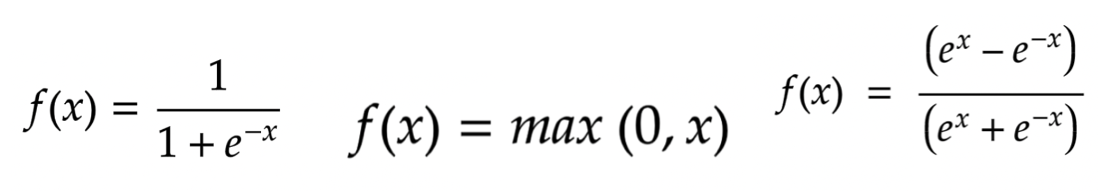

In [ ]:
def sigmoid(y):
  return 1 / (1 + math.exp(-y))
print(sigmoid(y)) #

0.8807970779778823


In [ ]:
def relu(a):
    return max(0.0, a)
print(relu(a))

0.0


In [ ]:
def tanh(z):
    return np.sinh(z) / np.cosh(z) or -1j * np.tan(1j*z)
print(tanh(z))

0.9993292997390669


### 3. Tworzenie sieci neuronowej

#### 3.1. Przygotowanie danych treningowych i testowych

Zacznim przejdziemy do trenowania sieci neuronowej musimy najpierw rozwiązać kilka problemów. Pierwszym z nich jest stworzenie odpowiednich zmiennych odnoszących się do danych treningowych oraz danych testowych.

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

Zanim przejdziemy dalej możemy podejrzeć nasze dane. Zastanówmy się do czego odnoszą się liczby 60000 oraz 28?

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### 3.2. Normalizacja i "spłaszczenie" danych

Na tym etapie powinniśmy mieć stworzone cztery zmienne odnoszące się do materiału treningowego oraz etykiet (osobno dla zbioru treningowego i testowego). Zanim przejdziemy dalej musimy zadać jeszcze o normalizację. Co właściwie zamierzamy zrobić z naszymi danymi? Chcemy sprowadzić wartości pikseli z zakresu od 0-255 do nowego zakresu -0.5-0.5. Dlaczego to robimy?

In [ ]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

Łatwiej jest operować na mniejszych liczbach, dla komputera również

255 bo 256 kolorów w datasetcie

Możemy jeszcze raz podejrzeć nasze dane, ale na tym etapie jeszcze nic się nie zmieniło.

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Teraz dokonujemy "spłaszczenia" (flatten) naszych danych. Skąd się bierze wartość 784? (to po prostu 28*28 = 784). Każdy obraz w danych treningowych MNIST ma wymiary 28 x 28 (oraz informację odnoszącą się do skali szarości). Spłaszczymy każdy obraz 28x28 do 784-wymiarowego wektora, którego użyjemy jako danych wejściowych do naszej sieci neuronowej.

Sprowadzamy do jednego wymiaru, zamiast 28, 28 chcemy mieć jedną wartość poprzez mnożenie przez siebie

In [ ]:
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

Teraz widzimy, że kształt naszych danych zmienił.

In [ ]:
print(train_images.shape)

(60000, 784)


#### 3.3. Przygotowanie architektury sieci neuronowej

Mamy już przygotowane dane, dokonaliśmy ich normalizacji oraz przeprowadziliśmy "spłaszczenie". Przechodzimy w końcu do etapu tworzenia architektury naszej sieci neuronowej. Wykorzystamy w tym celu klasę Sequential. Mamy do wyboru teraz kilka możliwości, które zależą od danych, które chcemy analizować.

*   Zważywszy na to, że chcemy przeprowadzić "prostą" klasyfikację danych MNIST (jeszcze bez wykorzystania CNN) stworzymy sieć neuronową, która będzie składała się z warstw gęstych (Dense), w których każdy neuron będzie połączony z innym neuronem.
*   Musimy tylko ustalić liczbę nodes oraz odpowiednią funkcję aktywacji.
*   Wskazujemy również odpowiednią wartość wejściową (input_shape).
*   Ostatnia wartość nodes odnosi się do ilości klas, ale jak ustalić wartość nodes w poprzednich warstwach?


In [ ]:
from keras.layers import Dropout

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)), #input_shape dla warstwy wejściowej to wyik mnożenia jak z płaszczenia
  Dense(64, activation='relu'), # warstwy ukryte to te w środku, Dense - klasa gęsta (każdy neuron połączony z każdym poprzednim)
  Dropout(0.2, input_shape=(784,)), # warstwy ukryte to te w środku, Dropout - nie uczy się nowych rzeczy, losowo usuwa wagi i połączenia, (tutaj 20%), żeby stymulować sieć i jej nie przeuczać
  Dense(10, activation='softmax'), # 64. 64. 10? 10 -> 10 neuronów w wartstwie wejściowej, bo sprawdzamy 10 liczb (klas), 64 -> liczba węzłów (więcej to więcej neuronów), wartość wybieramy w praktyce
])

1. Liczba węzłów -> więcej danych więcej węzłów
2. Dense pierwszy >= od kolejnego

Czemu tyle warstw? Więcej danych -> więcej warstw, potem sprawdzamy w praktyce i modyfikujemy

Softmax > 2 klasy
Sigmoid -> 2 klasy

#### 3.4. Optymalizator, funkcja straty i metryki

W tym miejscu dokonujemy wyboru odpowiedniego optymalizatora, dobieramy funkcję straty oraz wskazujemy metryki, które wykorzystamy do oceny przydatności naszego modelu. Zagadnienia te zostaną poruszone na następnym wykładzie.

In [ ]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#### 3.5. Trenowanie sieci neuronowej

W końcu przechodzimy do etapu trenowania przygotowanej przez nas architektury sieci neuronowej. Musimy jeszcze określić liczbę epok ("cykli trenowania sieci") oraz batch size. Pod koniec uzyskujemy informacje dotyczące straty walidacji oraz dokładności klasyfikacji.

In [ ]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5, #liczba cykli trenowania
  batch_size=30, # z dużym vramem to 40-50
)

Epoch 1/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2571 - accuracy: 0.9297
Epoch 2/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2280 - accuracy: 0.9377
Epoch 3/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2185 - accuracy: 0.9407
Epoch 4/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1994 - accuracy: 0.9464
Epoch 5/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1949 - accuracy: 0.9491


### 4. Zadania

#### 4.1 Zadanie 1

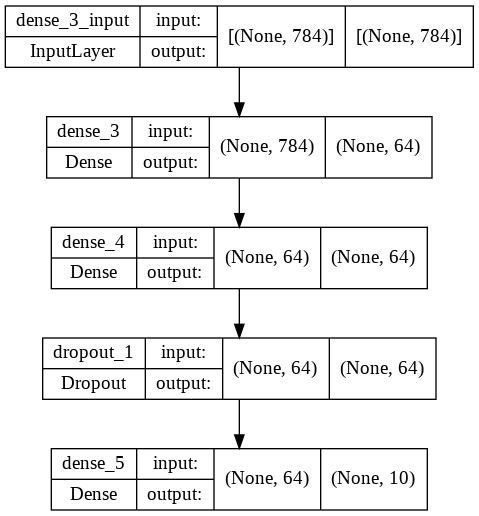

In [ ]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

#### 4.2 Zadanie 2

In [ ]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=100,
  batch_size=30,
)

Epoch 1/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1804 - accuracy: 0.9507
Epoch 2/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1808 - accuracy: 0.9519
Epoch 3/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1675 - accuracy: 0.9547
Epoch 4/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1642 - accuracy: 0.9565
Epoch 5/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1598 - accuracy: 0.9574
Epoch 6/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1611 - accuracy: 0.9578
Epoch 7/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1596 - accuracy: 0.9591
Epoch 8/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1523 - accuracy: 0.9597
Epoch 9/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1436 - accuracy: 0.9620
Epoch 10/100
2000/2000 [==============================] - 4s 2ms/step - l

W okolicy Epocha 20-30 wartość accuracy doszła do okolic ~0.97, a w kolejnych iteracjach widzimy różne, podobne wartość, które już do końca oscylują w granach 0.95 - 0.97.

#### 4.3 Zadanie 3

In [ ]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=20,
)

Epoch 1/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1781 - accuracy: 0.9596
Epoch 2/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2050 - accuracy: 0.9586
Epoch 3/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1865 - accuracy: 0.9546
Epoch 4/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2101 - accuracy: 0.9547
Epoch 5/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2035 - accuracy: 0.9548


Model wystartował z dobrego poziomu, jednak w połowie treningu dla batch_size = 20 wartości w kolejnych echossach szły w dół, czym samym model stawał się co raz mniej dokładny, chociaż wartości nie różniły się drastycznie

#### 4.4 Zadanie 4


In [ ]:
model2 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dropout(0.2, input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dropout(0.2, input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [ ]:
model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model2.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=30,
)

Epoch 1/5
2000/2000 [==============================] - 5s 2ms/step - loss: 0.9475 - accuracy: 0.7657
Epoch 2/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3340 - accuracy: 0.9132
Epoch 3/5
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2638 - accuracy: 0.9319
Epoch 4/5
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2238 - accuracy: 0.9439
Epoch 5/5
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1915 - accuracy: 0.9511


Dla datasetu o tych rozmiarach próba ustawienia dropoutu na poziomie 0.3-0.4 dała gorsze rezultaty. Dodanie dodatkowych warts oraz drugiego dropoutu z wartością ponownie ustawioną na 0.2 skutkowała niższą dokładnością, ale i dużym wzrostem dokładności pomiędzy kolejnowymi epochami. Ostatecznie otrzymany model jest nieznacznie bardziej dokładny od orygnalnego przy mniejszej stracie.

#### 4.5 Zadanie 5

In [ ]:
model_x = Sequential([
  Dense(256, activation='linear', input_shape=(784,)),
  Dense(256, activation='linear'),
  Dense(256, activation='linear'),
  Dense(128, activation='linear'),
  Dense(128, activation='linear'),
  Dense(128, activation='linear'),
  Dense(64, activation='linear'),
  Dense(64, activation='linear'),
  Dense(64, activation='linear'),
  Dense(10, activation='linear'),
])

model_x.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_x.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=30,
)

Epoch 1/10
2000/2000 [==============================] - 10s 5ms/step - loss: 7.3991 - accuracy: 0.0975
Epoch 2/10
2000/2000 [==============================] - 9s 5ms/step - loss: 7.3888 - accuracy: 0.0974
Epoch 3/10
2000/2000 [==============================] - 9s 5ms/step - loss: 7.3888 - accuracy: 0.0974
Epoch 4/10
2000/2000 [==============================] - 9s 5ms/step - loss: 7.3888 - accuracy: 0.0974
Epoch 5/10
2000/2000 [==============================] - 10s 5ms/step - loss: 7.3888 - accuracy: 0.0974
Epoch 6/10
2000/2000 [==============================] - 9s 5ms/step - loss: 7.3888 - accuracy: 0.0974
Epoch 7/10
2000/2000 [==============================] - 9s 5ms/step - loss: 7.3888 - accuracy: 0.0974
Epoch 8/10
2000/2000 [==============================] - 9s 5ms/step - loss: 7.3888 - accuracy: 0.0974
Epoch 9/10
2000/2000 [==============================] - 10s 5ms/step - loss: 7.3888 - accuracy: 0.0974
Epoch 10/10
2000/2000 [==============================] - 9s 5ms/step - loss: 7.

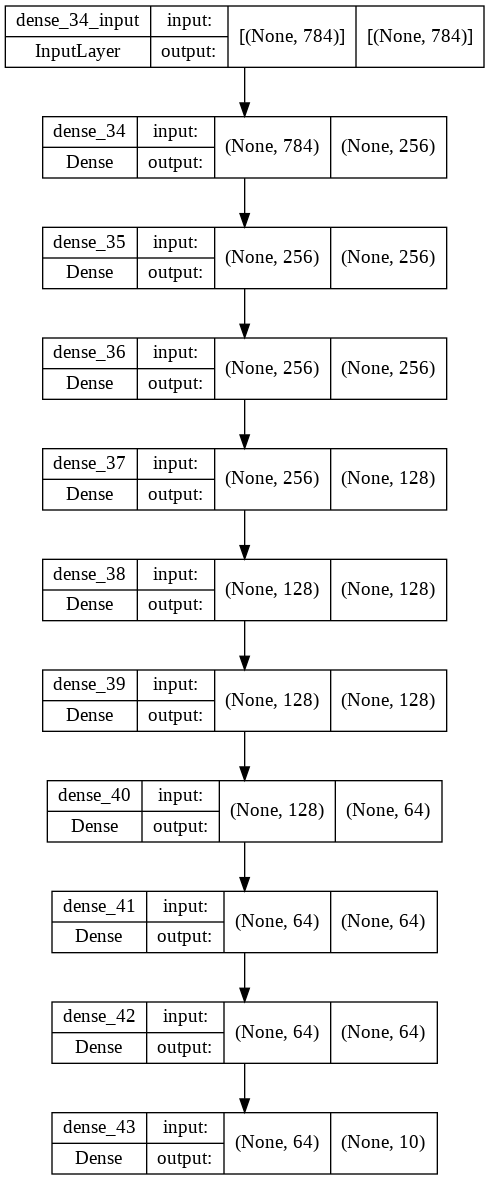

In [ ]:
plot_model(
    model_x,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
model_y = Sequential([
  Dense(256, activation='linear', input_shape=(784,)),
  Dense(128, activation='linear'),
  Dense(64, activation='linear'),
  Dense(10, activation='linear'),
])

model_y.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_y.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=30,
)

Epoch 1/10
2000/2000 [==============================] - 6s 3ms/step - loss: 7.8371 - accuracy: 0.1777
Epoch 2/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.2887 - accuracy: 0.2073
Epoch 3/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.2309 - accuracy: 0.2083
Epoch 4/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.2309 - accuracy: 0.2083
Epoch 5/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.2309 - accuracy: 0.2083
Epoch 6/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.2310 - accuracy: 0.2083
Epoch 7/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.2310 - accuracy: 0.2083
Epoch 8/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.2309 - accuracy: 0.2083
Epoch 9/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.2310 - accuracy: 0.2083
Epoch 10/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.230

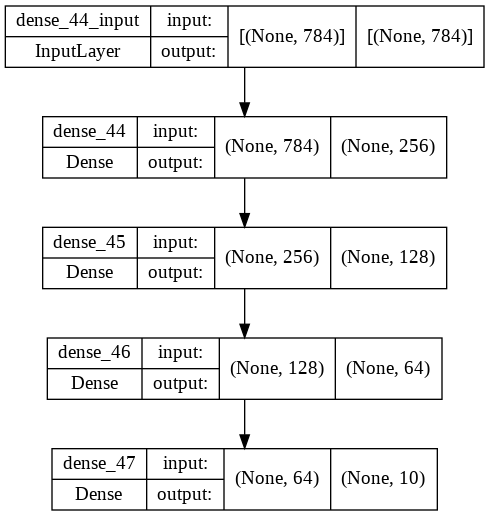

In [ ]:
plot_model(
    model_y,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

Obie architektury wchodzą w stagnacje, gdzie od drugiego epocha nie udaje już poprawić się rezultatów. Pierwsza architektura daje lepsze wyniki ze względu na wartości, a nie przez jej większą liczbę warstw.

Wynika z tego, że linearność nie jest cechą pożądaną w modelach sieci neuronowych. Funkcje aktywacji mają na celu wprowadzenie nieliniowości do architektury, a podejście linearne zachowuje się jak pojedynczy perceptron.